# Groundtruth

**Plate description**:\
Plate number 120\
Strain: C2\
Treatment: 100C\
Crossdate: 01/07\


**Experience description**\


## Setup

### Imports

In [48]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
import os
from PIL import Image
import matplotlib.pyplot as plt
import random
import numpy as np
from amftrack.util.sys import (
    get_current_folders,
    update_plate_info,
    test_path
)
import pandas as pd
from amftrack.util.plot import show_image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
from amftrack.util.sys import storage_path
from amftrack.util.geometry import generate_index_along_sequence, centered_bounding_box

In [50]:
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    Node,
    Edge,
)
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    distance_point_edge,
    plot_edge,
    plot_edge_cropped,
    find_nearest_edge,
    get_edge_from_node_labels,
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    find_neighboring_edges,
    reconstruct_image,
    reconstruct_skeletton_from_edges,
    reconstruct_skeletton_unicolor,
    plot_edge_width,
    plot_full,
)

In [51]:
from amftrack.pipeline.functions.image_processing.experiment_util import (
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    plot_hulls_skelet,
    plot_full,
    reconstruct_image_from_general,
)
from amftrack.util.video_util import make_video_targeted

In [52]:
from amftrack.util.image_analysis import (
    find_transformation,
    get_transformation,
    reverse_transformation,
    convert_to_micrometer,
    find_image_index,
    is_in_image,
    extract_inscribed_rotated_image,
    is_negative_similarity,
    find_similarity,
    find_scaling_factor,
)

### General parameters

In [53]:
directory = "/gpfs/work1/0/einf914/data" + "/"

### Experiment object setup

In [54]:
update_plate_info(directory)
folder_df = get_current_folders(directory)

analysed:   0%|          | 0/2567 [00:00<?, ?it/s]

In [55]:
folder_df['Plate'].unique()

array(['85', '1015', '1023', '30', '1076', '1044', '23', '1047', '1045',
       '1033', '86', '12', '1048', '6', '1040', '27', '1070', '21', '33'],
      dtype=object)

In [56]:
select = folder_df[folder_df['Plate']=='85']

In [61]:
len(select)

123

In [63]:
set(select['unique_id'])

{'85_20220706'}

Only load part of the timesteps

In [37]:
exp = Experiment(directory)
exp.load(select.head(30), suffix="")

2022-07-07 02:52:00
2022-07-07 06:51:00
2022-07-07 12:47:00
2022-07-08 01:18:00
2022-07-08 03:18:00
2022-07-08 09:18:00
2022-07-08 11:18:00
2022-07-08 23:57:00
2022-07-09 23:57:00
2022-07-10 19:56:00
2022-07-10 21:57:00
2022-07-11 20:11:00
2022-07-12 12:11:00
2022-07-12 16:28:00
2022-07-13 00:28:00
2022-07-13 18:00:00
2022-07-13 22:00:00
2022-07-14 00:01:00
2022-07-14 06:00:00
2022-07-14 10:01:00
2022-07-14 16:25:00
2022-07-15 13:07:00
2022-07-15 15:07:00
2022-07-15 21:07:00
2022-07-16 05:07:00
2022-07-16 19:07:00
2022-07-16 23:07:00
2022-07-17 03:08:00
2022-07-17 11:08:00
2022-07-17 15:08:00


Finding first and last steps

In [58]:
pd.set_option('display.max_rows', 500)
select['date'].sort_values()

1841    06.07.2022, 18:40:
1752    06.07.2022, 20:52:
730     06.07.2022, 22:51:
599     07.07.2022, 00:51:
406     07.07.2022, 02:52:
944     07.07.2022, 04:51:
150     07.07.2022, 06:51:
2086    07.07.2022, 08:51:
1013    07.07.2022, 10:47:
389     07.07.2022, 12:47:
1716    07.07.2022, 15:04:
2485    07.07.2022, 17:18:
548     07.07.2022, 19:18:
2366    07.07.2022, 21:18:
2214    07.07.2022, 23:18:
214     08.07.2022, 01:18:
57      08.07.2022, 03:18:
1788    08.07.2022, 05:18:
1050    08.07.2022, 07:18:
36      08.07.2022, 09:18:
0       08.07.2022, 11:18:
2471    08.07.2022, 13:56:
1812    08.07.2022, 15:56:
2461    08.07.2022, 17:56:
1496    08.07.2022, 19:56:
1176    08.07.2022, 21:57:
382     08.07.2022, 23:57:
1952    09.07.2022, 01:57:
1189    09.07.2022, 03:57:
2154    09.07.2022, 05:56:
1819    09.07.2022, 07:56:
1252    09.07.2022, 09:57:
627     09.07.2022, 11:57:
1463    09.07.2022, 13:57:
1263    09.07.2022, 15:57:
732     09.07.2022, 17:56:
1232    09.07.2022, 19:56:
1

In [69]:
last_row = folder_df.iloc[1793]
first_row = folder_df.iloc[1841]
groundtruth_row = folder_df.iloc[674] # last row before

In [70]:
index_list = [1841,1793, 25]
extreme_df = folder_df.loc[folder_df.index[index_list]]

In [71]:
extreme_df['unique_id']
exp_first = Experiment(directory)
exp_first.load(extreme_df, suffix="")

1841    85_20220706
1793    85_20220706
25      85_20220706
Name: unique_id, dtype: object

## 0/ General visualisation of the plate

### Full plate at the start

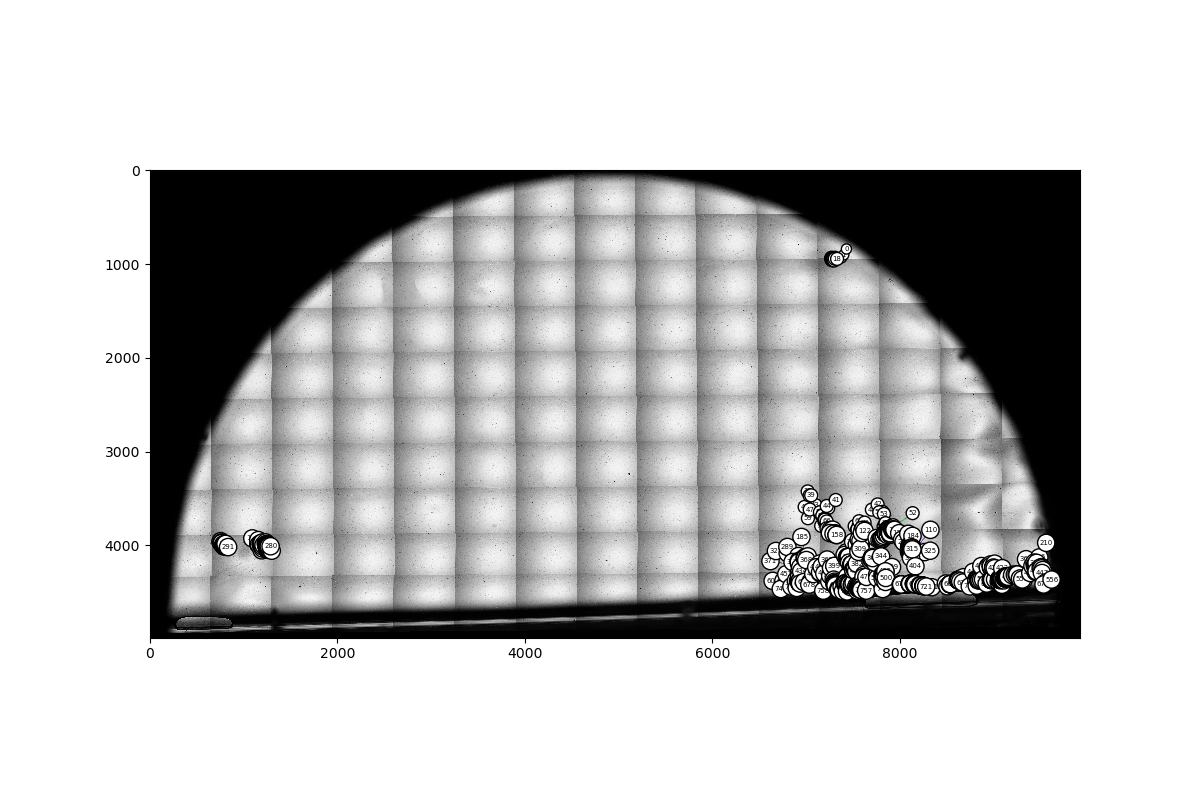

In [17]:
#%matplotlib inline
t = 0
exp.load_tile_information(t)
plot_full(exp, t, downsizing = 5, dilation = 10, edges = get_all_edges(exp, t), nodes = get_all_nodes(exp, t))

### Full plate at the end

2022-07-06 18:40:00
2022-07-18 03:07:00


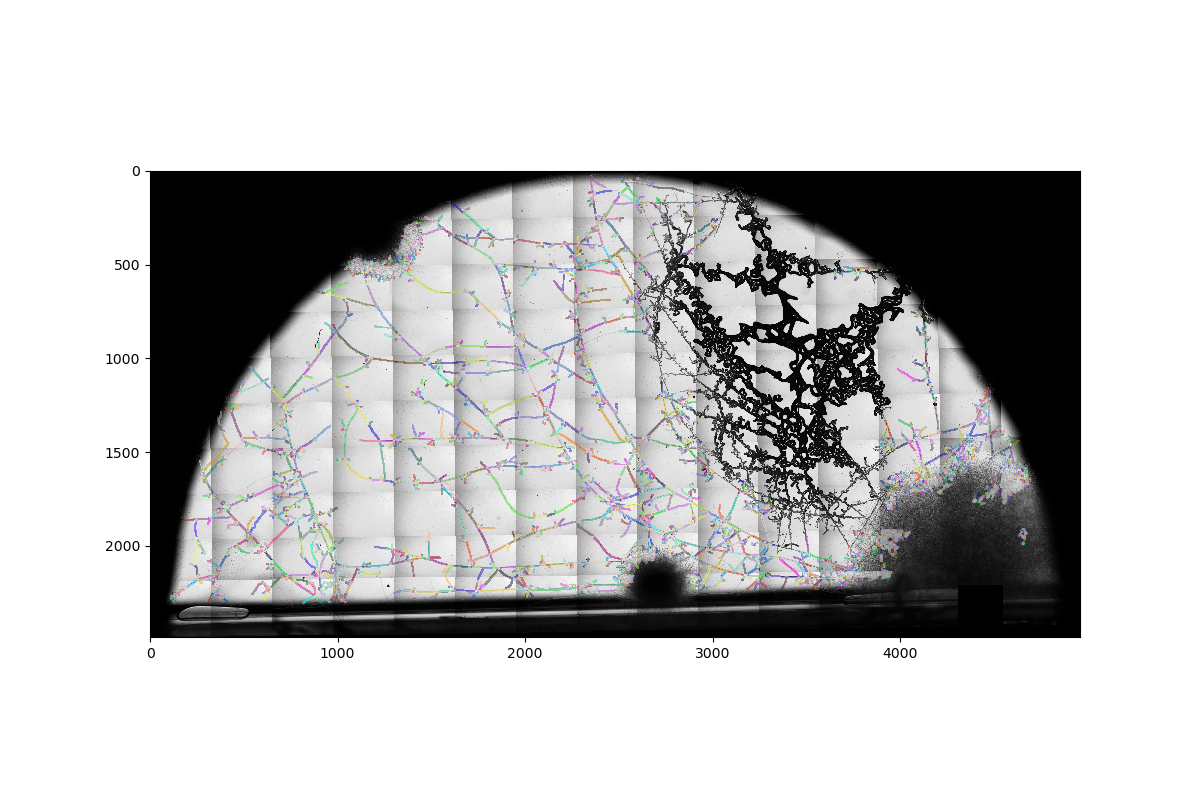

In [18]:
t = 1
exp_first.load_tile_information(t)
plot_full_image_with_features(exp_first, t, downsizing = 10, dilation = 10, edges = get_all_edges(exp_first, t))

## Full plate right before groundtruths

2022-07-06 18:40:00
2022-07-13 18:00:00
2022-07-18 03:07:00


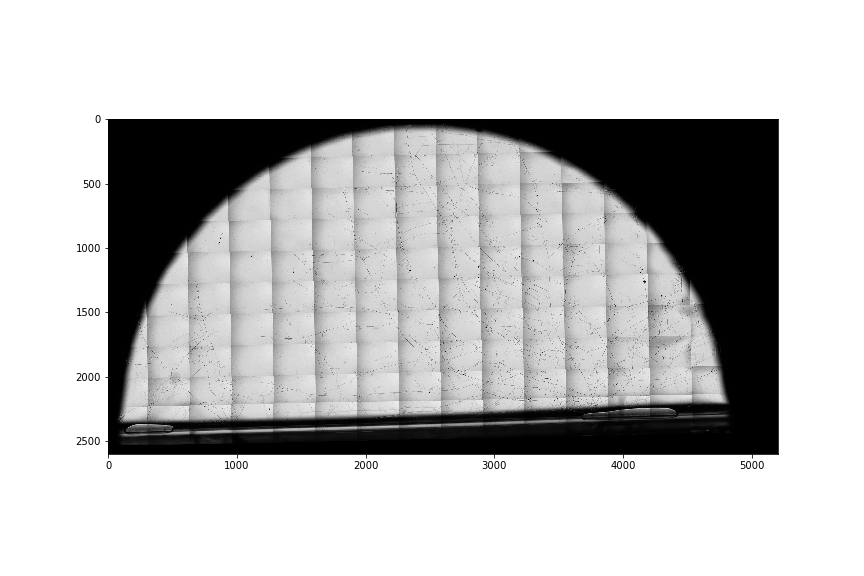

In [76]:
exp_first = Experiment(directory)
exp_first.load(extreme_df, suffix="")
t = 1
exp_first.load_tile_information(t)
plot_full(exp_first, t, downsizing = 10, region = [[0, 0], [26000, 52000]])

### Skeletonization check

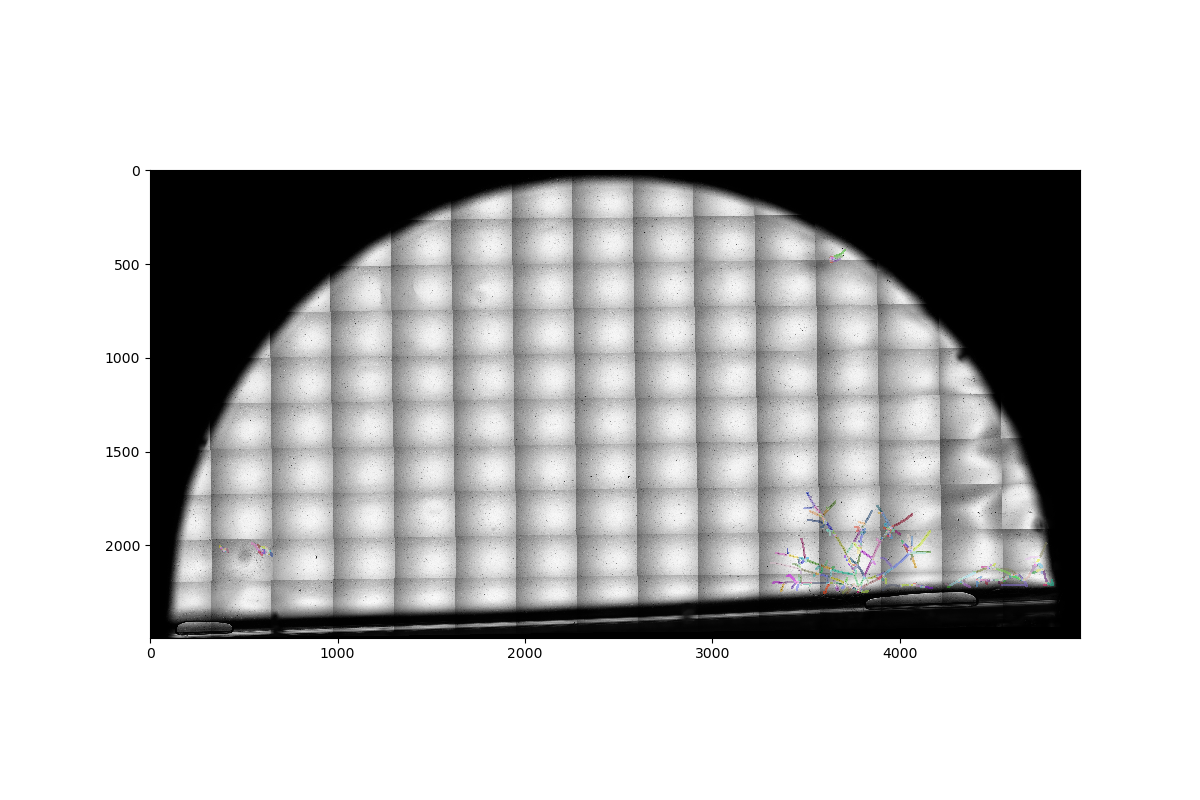

In [38]:
t = 0
exp.load_tile_information(t)
plot_full_image_with_features(exp, t, downsizing = 10, dilation = 10, edges = get_all_edges(exp, t))

## 0/ Identify plane transformation

In [78]:
joystick_coord = [[64900, 43500], [44980, 13940], [2500, 32980], [920, 32860]]
plt_10_coord = [[4474, 2021], [3213, 318], [777, 1686], [666, 1666]]
general_coord = [np.array([c[1], c[0]])*10 for c in plt_10_coord]

In [79]:
f = find_similarity(joystick_coord, general_coord)

[0.5944765172890004, 0.5866171690437797, 0.5896683161686727, 0.6001561350871746, 0.6009782536563509, 0.7117943990567758]
Similarity ratio: 0.5973163261880875
Similarity is a negative similarity
Rotation: [[ 0.99717929 -0.07505642]
 [ 0.07505642  0.99717929]]
Translation: [-2859.98343353  4572.00328319]


## 1/ Bas groundtruth coordinates

#### Original coordinates in joystick setup

In [87]:
groundtruths = [
    [64900, 43500],
    [44980, 13940],
    [45420, 13700],
    [38600, 18060],
    [33740, 14860],
    [32100, 14680],
    [26920, 11900],
    [18840, 18320],
    [19500, 20680],
    [19220, 20860],
    [19860, 22080],
    [20740, 22400],
    [21500, 24820],
    [15800, 26700],
    [18420, 27100],
    [13520, 33280],
    [23860, 36300],
    [20200, 42860],
    [43180, 43160],
    [40960, 37200],
    [30380, 30700],
    [27980, 26920],
    [26280, 27400],
    [24500, 27300],
    [25160, 28180],
    [16700, 29720],
    [14660, 44800],
    [17140, 39560],
    [1460, 35480],
    [2500, 32980],
    [920, 32860],
    [340, 30120],
    [2060, 27940],
    [3540, 26120],
    [34920, 42820],
    [35280, 43760],
    [33720, 44600],
    [32160, 35120],
    [24440, 32900],
    [23640, 29180],
    [7140, 43960],
]

In [88]:
len(groundtruths)

41

In [89]:
groundtruths_general = [f(c) for c in groundtruths]

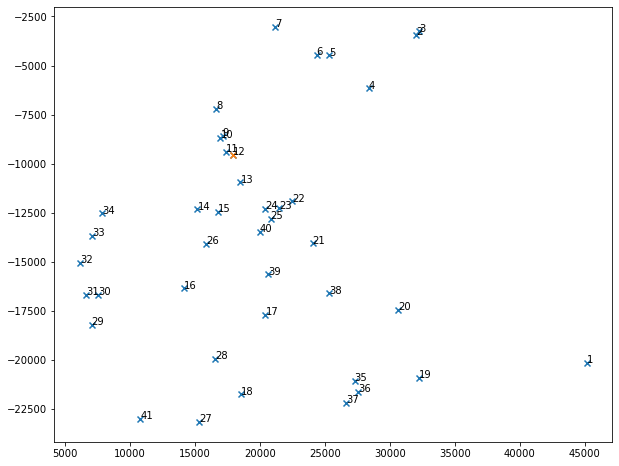

In [90]:
import matplotlib.transforms as mtransforms
%matplotlib inline
plt.figure(figsize=(10,8))
xs = [-a[0] for a in groundtruths_general]
ys = [a[1] for a in groundtruths_general]
plt.scatter(ys, xs, marker = "x")
#plt.scatter([69340], [-45120], marker = "x")
i = 11
plt.scatter([ys[i]], [xs[i]], marker = "x")

for i, (x, y) in enumerate(zip(xs, ys)):
    plt.text(y, x, f'{i+1}')

#### Test the transformation

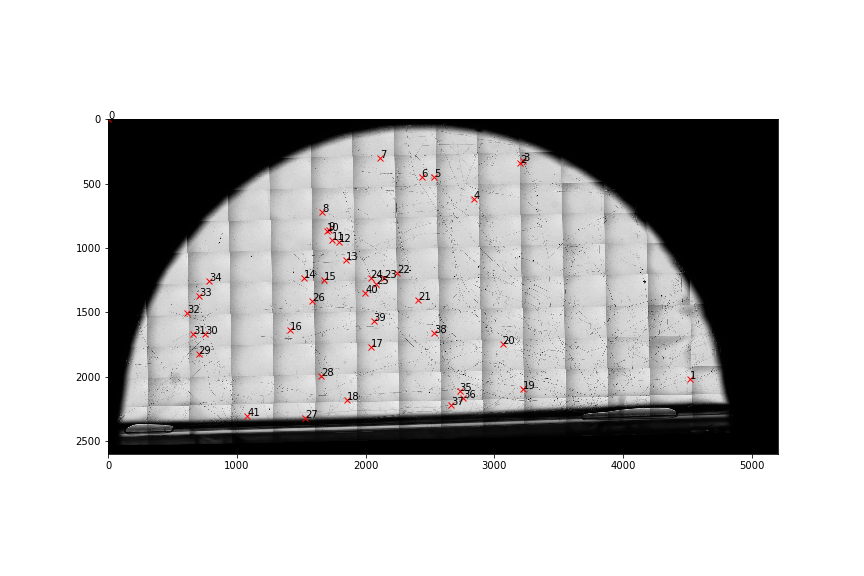

In [92]:
# %matplotlib inline
groundtruths_general.insert(0,[0, 0]) # to have matching indexes with my notes
%matplotlib widget
t = 1
exp_first.load_tile_information(t)
plot_full(exp_first, t, downsizing = 10, region = [[0, 0], [26000, 52000]], points = groundtruths_general, with_point_label = True)

In [93]:
groundtruths_general_clean_plt = [
    [4469,2015],
    [3200,326],
    [3227,311],
    [2963,578],
    [2734,384],
    [2641,374],
    [2327,193],
    [1838,575],
    [1881,688],
    [1855,716],
    [1871,781],
    [1903,797],
    [1961,947],
    [1654,1065],
    [1776,1057],
    [1473,1483],
    [2088,1618],
    [1887,2046],
    [3217,2005],
    [3117,1646],
    [2460,1302],
    [2300,1080],
    [2216,1121],
    [2130,1110],
    [2150,1147],
    [1671,1266],
    [1573,2153],
    [1685,1847],
    [751,1717],
    [750,1658],
    [666,1668],
    [584,1538],
    [680,1406],
    [687,1377],
    [2732,1995],
    [2780,2028],
    [2701,2104],
    [2566,1530],
    [2121,1436],
    [2062,1216],
    [1131,2136],
]

In [94]:
g = lambda c: np.array([c[1], c[0]])*10

In [95]:
groundtruths_general_clean = [g(c) for c in groundtruths_general_clean_plt]

In [97]:
groundtruths_general_clean

[array([20150, 44690]),
 array([ 3260, 32000]),
 array([ 3110, 32270]),
 array([ 5780, 29630]),
 array([ 3840, 27340]),
 array([ 3740, 26410]),
 array([ 1930, 23270]),
 array([ 5750, 18380]),
 array([ 6880, 18810]),
 array([ 7160, 18550]),
 array([ 7810, 18710]),
 array([ 7970, 19030]),
 array([ 9470, 19610]),
 array([10650, 16540]),
 array([10570, 17760]),
 array([14830, 14730]),
 array([16180, 20880]),
 array([20460, 18870]),
 array([20050, 32170]),
 array([16460, 31170]),
 array([13020, 24600]),
 array([10800, 23000]),
 array([11210, 22160]),
 array([11100, 21300]),
 array([11470, 21500]),
 array([12660, 16710]),
 array([21530, 15730]),
 array([18470, 16850]),
 array([17170,  7510]),
 array([16580,  7500]),
 array([16680,  6660]),
 array([15380,  5840]),
 array([14060,  6800]),
 array([13770,  6870]),
 array([19950, 27320]),
 array([20280, 27800]),
 array([21040, 27010]),
 array([15300, 25660]),
 array([14360, 21210]),
 array([12160, 20620]),
 array([21360, 11310])]

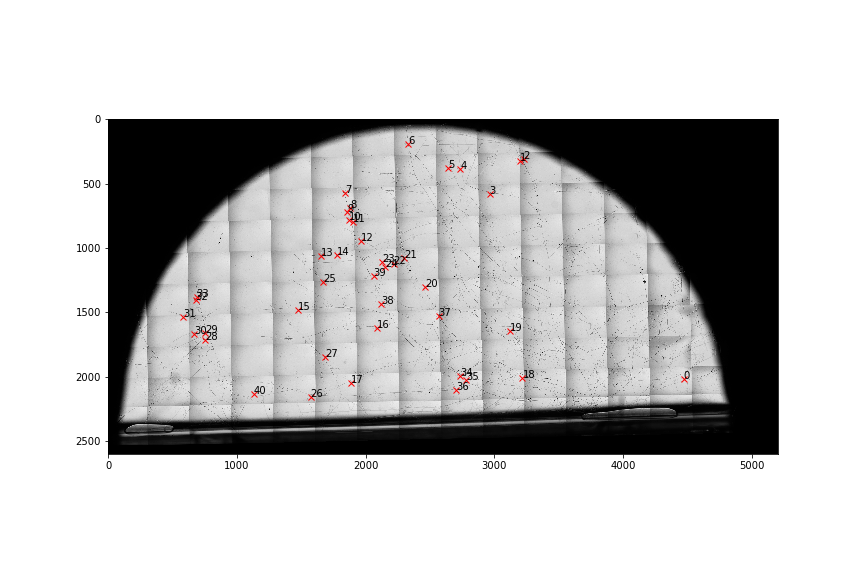

In [98]:
# %matplotlib inline
groundtruths_general.insert(0,[0, 0]) # to have matching indexes with my notes
%matplotlib widget
t = 1
exp_first.load_tile_information(t)
plot_full(exp_first, t, downsizing = 10, region = [[0, 0], [26000, 52000]], points = groundtruths_general_clean, with_point_label = True)

## 2 Make movies

### Test

In [102]:
make_video_targeted(exp, coordinate=[20150, 44690], directory_path="/gpfs/work1/0/einf914/test", size=600)

['/gpfs/work1/0/einf914/test/20220707-0252.png',
 '/gpfs/work1/0/einf914/test/20220707-0651.png',
 '/gpfs/work1/0/einf914/test/20220707-1247.png',
 '/gpfs/work1/0/einf914/test/20220708-0118.png',
 '/gpfs/work1/0/einf914/test/20220708-0318.png',
 '/gpfs/work1/0/einf914/test/20220708-0918.png',
 '/gpfs/work1/0/einf914/test/20220708-1118.png',
 '/gpfs/work1/0/einf914/test/20220708-2357.png',
 '/gpfs/work1/0/einf914/test/20220709-2357.png',
 '/gpfs/work1/0/einf914/test/20220710-1956.png',
 '/gpfs/work1/0/einf914/test/20220710-2157.png',
 '/gpfs/work1/0/einf914/test/20220711-2011.png',
 '/gpfs/work1/0/einf914/test/20220712-1211.png',
 '/gpfs/work1/0/einf914/test/20220712-1628.png',
 '/gpfs/work1/0/einf914/test/20220713-0028.png',
 '/gpfs/work1/0/einf914/test/20220713-1800.png',
 '/gpfs/work1/0/einf914/test/20220713-2200.png',
 '/gpfs/work1/0/einf914/test/20220714-0001.png',
 '/gpfs/work1/0/einf914/test/20220714-0600.png',
 '/gpfs/work1/0/einf914/test/20220714-1001.png',
 '/gpfs/work1/0/einf

In [103]:
res = ['/gpfs/work1/0/einf914/test/20220707-0252.png',
 '/gpfs/work1/0/einf914/test/20220707-0651.png',
 '/gpfs/work1/0/einf914/test/20220707-1247.png',
 '/gpfs/work1/0/einf914/test/20220708-0118.png',
 '/gpfs/work1/0/einf914/test/20220708-0318.png',
 '/gpfs/work1/0/einf914/test/20220708-0918.png',
 '/gpfs/work1/0/einf914/test/20220708-1118.png',
 '/gpfs/work1/0/einf914/test/20220708-2357.png',
 '/gpfs/work1/0/einf914/test/20220709-2357.png',
 '/gpfs/work1/0/einf914/test/20220710-1956.png',
 '/gpfs/work1/0/einf914/test/20220710-2157.png',
 '/gpfs/work1/0/einf914/test/20220711-2011.png',
 '/gpfs/work1/0/einf914/test/20220712-1211.png',
 '/gpfs/work1/0/einf914/test/20220712-1628.png',
 '/gpfs/work1/0/einf914/test/20220713-0028.png',
 '/gpfs/work1/0/einf914/test/20220713-1800.png',
 '/gpfs/work1/0/einf914/test/20220713-2200.png',
 '/gpfs/work1/0/einf914/test/20220714-0001.png',
 '/gpfs/work1/0/einf914/test/20220714-0600.png',
 '/gpfs/work1/0/einf914/test/20220714-1001.png',
 '/gpfs/work1/0/einf914/test/20220714-1625.png',
 '/gpfs/work1/0/einf914/test/20220715-1307.png',
 '/gpfs/work1/0/einf914/test/20220715-1507.png',
 '/gpfs/work1/0/einf914/test/20220715-2107.png',
 '/gpfs/work1/0/einf914/test/20220716-0507.png',
 '/gpfs/work1/0/einf914/test/20220716-1907.png',
 '/gpfs/work1/0/einf914/test/20220716-2307.png',
 '/gpfs/work1/0/einf914/test/20220717-0308.png',
 '/gpfs/work1/0/einf914/test/20220717-1108.png',
 '/gpfs/work1/0/einf914/test/20220717-1508.png']

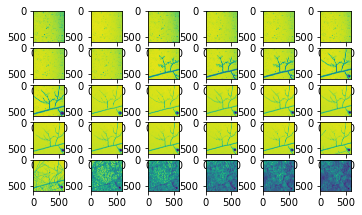

In [104]:
%matplotlib inline
for i in range(30):
    plt.subplot(6, 6, i+1)
    show_image(res[i])

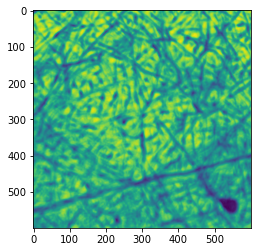

In [105]:
show_image(res[25])

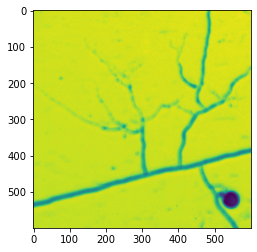

In [106]:
show_image(res[21])

## 4/ Extract movies for each BAS

In [107]:
from amftrack.pipeline.launching.run_super import run_parallel_all_time,run_launcher
from amftrack.util.formatting import coord_list_to_str, str_to_coord_list

In [108]:
directory = "/gpfs/work1/0/einf914/data/"

In [245]:
update_plate_info(directory)
folder_df = get_current_folders(directory)

analysed:   0%|          | 0/2444 [00:00<?, ?it/s]

In [246]:
folder_df['Plate'].unique()

array(['1015', '1023', '30', '1076', '1044', '23', '1047', '1045', '1033',
       '86', '12', '1048', '6', '1040', '27', '1070', '21', '33'],
      dtype=object)

In [247]:
select = folder_df[folder_df['Plate']=='85']

In [109]:
len(select)

123

In [110]:
directory

'/gpfs/work1/0/einf914/data/'

In [111]:
num_parallel = 1
time = '300:00'
args = [directory, coord_list_to_str(groundtruths_general_clean), 1500, True, False]
run_parallel_all_time(
    "make_video_targeted.py",
    args,
    select,
    num_parallel,
    time,
    "make_video_felix_gr",
    cpus=32,
    node="fat",
    dependency=False,
    name_job="felix_video_gr.sh",
)

sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.


Submitted batch job 1251277


In [33]:
len(select)

164

## Brouillon

In [40]:
from amftrack.util.plot import make_random_color

In [74]:
def convert(c):
    c_ = c/255
    return (c_[0], c_[1], c_[2])

In [117]:
def plot_nuancier(n = 10):
    im = np.full((1, n, 4), fill_value = 1)
    for i in range(n):
        im[0, i, :] = make_random_color((i))
    plt.imshow(im)

In [70]:
convert(make_random_color(1))

(34, 145, 216)

<IPython.core.display.Javascript object>


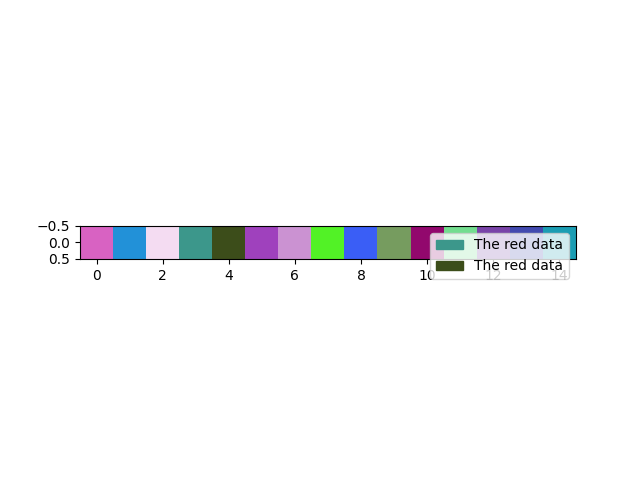

In [116]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
red_patch1 = mpatches.Patch(color=convert(make_random_color(3)), label='The red data')
red_patch2 = mpatches.Patch(color=convert(make_random_color(4)), label='The red data')
ax.legend(handles=[red_patch1, red_patch2])

plt.show()